## 1. 타이타닉호를 가장 많이 탑승한 항구

In [7]:
import csv

f = open("./data/titanic.csv")
data = csv.reader(f)
next(data)

C_harbor = 0
Q_harbor = 0
S_harbor = 0

for row in data:
    if row[-1] == "C":
        C_harbor+=1
    if row[-1] == "Q":
        Q_harbor+=1
    if row[-1] == "S":
        S_harbor+=1

most_harbor = "Cherbourg"
if C_harbor < Q_harbor or C_harbor < S_harbor:
    if S_harbor < Q_harbor:
        most_harbor = "Queenstown"
    if Q_harbor < S_harbor:
        most_harbor = "Southampton"
# print(C_harbor,Q_harbor,S_harbor)
print("고객들이 타이타닉호에 가장 많이 탑승한 항구는", most_harbor)

고객들이 타이타닉호에 가장 많이 탑승한 항구는 Southampton


## 2. 타이타닉호, 나이대 별로 보는 생존자와 사망자 통계 그래프
#### 0대부터 100대 이상까지 생존자와 사망자를 한눈에 볼 수 있게 그래프 위에 정확한 숫자를 표기했다.
#### 그리고 나이대별로 생존자와 사망자를 단번에 알아볼 수 있게 생존자 그래프옆에 바로 사망자 그래프를 배치했다.
##### 분석: 나이 상관없이 많은 사람들이 사망했다. 모든 나이대에 생존자보다 사망자가 더 높다. (유일하게 0대(0~9세)가 사망자보다 생존자가 더 많다.) 
##### (80대 제외)

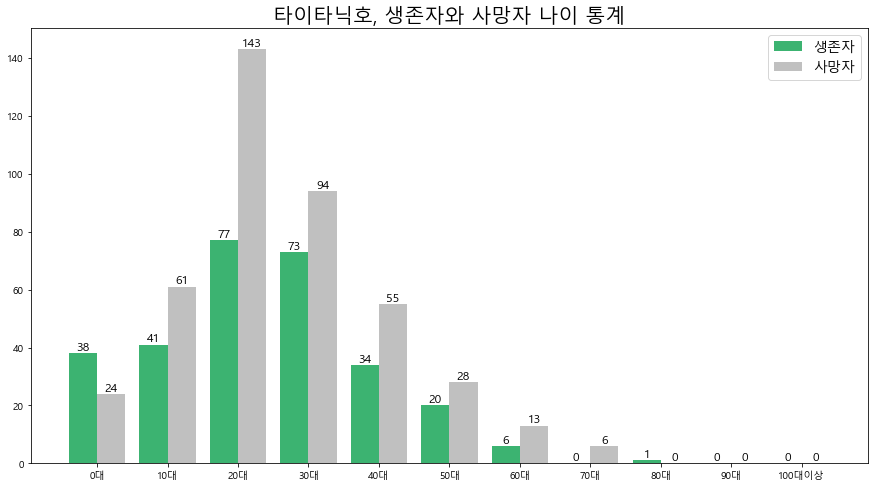

In [4]:
import csv
import matplotlib.pyplot as plt

f = open("./data/titanic.csv")
data = csv.reader(f)
next(data)

survived = []
died = []

for row in data:
    if row[5] == "":
        row[5] = "?"
    if row[1] == "1" and row[5] != "?": #생존자
        survived.append(int(float(row[5])))
    if row[1] == "0" and row[5] != "?": #사망자
        died.append(-int(float(row[5])))
        
survived_age = [0,0,0,0,0,0,0,0,0,0,0] #0대~100대
died_age = [0,0,0,0,0,0,0,0,0,0,0] #0대~100대
for i in range(len(survived)):
    if survived[i] < 10:
        survived_age[0]+=1
    elif survived[i] < 20:
        survived_age[1]+=1
    elif survived[i] < 30:
        survived_age[2]+=1
    elif survived[i] < 40:
        survived_age[3]+=1
    elif survived[i] < 50:
        survived_age[4]+=1
    elif survived[i] < 60:
        survived_age[5]+=1
    elif survived[i] < 70:
        survived_age[6]+=1
    elif survived[i] < 80:
        survived_age[7]+=1
    elif survived[i] < 90:
        survived_age[8]+=1
    elif survived[i] < 100:
        survived_age[9]+=1
    else:
        survived_age[10]+=1
    
for i in range(len(died)):
    if died[i] > -10:
        died_age[0]+=1
    elif died[i] > -20:
        died_age[1]+=1
    elif died[i] > -30:
        died_age[2]+=1
    elif died[i] > -40:
        died_age[3]+=1
    elif died[i] > -50:
        died_age[4]+=1
    elif died[i] > -60:
        died_age[5]+=1
    elif died[i] > -70:
        died_age[6]+=1
    elif died[i] > -80:
        died_age[7]+=1
    elif died[i] > -90:
        died_age[8]+=1
    elif died[i] > -100:
        died_age[9]+=1
    else:
        died_age[10]+=1
    
# print(survived_age)    
# print(died_age)
# survived.sort()
# died = sorted(died,reverse=True)
# plt.bar(range(len(survived_age)),survived_age)
# plt.bar(range(len(died_age)),died_age)

plt.figure(figsize=(15, 8))
plt.rc("font", family="Malgun Gothic")
topics = ['0대', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대', '100대이상']
def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]
value_a_x = create_x(2, 0.8, 1, 11)
value_b_x = create_x(2, 0.8, 2, 11)
ax = plt.subplot()
bar1 = ax.bar(value_a_x, survived_age, label="생존자", color="mediumseagreen")
bar2 = ax.bar(value_b_x, died_age, label="사망자", color="silver")
middle_x = [(a+b)/2 for (a,b) in zip(value_a_x, value_b_x)]
ax.set_xticks(middle_x)
ax.set_xticklabels(topics)
plt.legend(loc='best', ncol=1, fontsize=14)
plt.title("타이타닉호, 생존자와 사망자 나이 통계", fontsize=20)

# 숫자 넣는 부분
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%i' % height, ha='center', va='bottom', size = 12)
    
# 숫자 넣는 부분
for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%i' % height, ha='center', va='bottom', size = 12) #"%.1f"하면 소수1점째수까지
    
plt.show()


## 타이타닉호, 성별로 보는 생존자와 사망자 통계 그래프
#### 생존자, 사망자 그래프를 나누고 생존과 사망한 남자,여자 수를 비교하기 쉽게 옆에 배치했다.
##### 분석: 구조를 우선적으로 여자, 어린아이, 나이드신분, 남자 순으로 구조한것같다. 타이타닉 영화에 나온 내용 그대로다.
##### 20대 남성이 가장 많이 사망했다. (비율로 보면 86%) (비율적으로는 30대 사망 남성비율이 가장 큼 ->89%) (60대 사망 남성비율(100%) 제외)
##### 20대 여성이 가장 많이 생존했다. (비율로 보면 67%) (비율로는 10대 생존 여성비율이 가장 큼 ->82%)

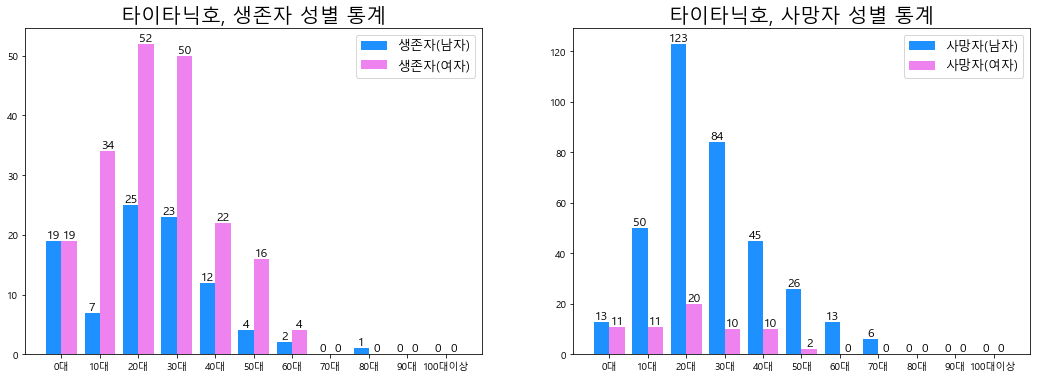

In [8]:
import csv
import matplotlib.pyplot as plt

f = open("./data/titanic.csv")
data = csv.reader(f)
next(data)

survived_man = []
survived_woman = []
died_man = []
died_woman = []

for row in data:
    if row[5] == "":
        row[5] = "?"
    if row[1] == "1" and row[5] != "?" and row[4] == "male": #생존자(남자)
        survived_man.append(int(float(row[5])))
    if row[1] == "1" and row[5] != "?" and row[4] == "female": #생존자(여자)
        survived_woman.append(-int(float(row[5])))
    if row[1] == "0" and row[5] != "?" and row[4] == "male": #사망자(남자)
        died_man.append(int(float(row[5])))
    if row[1] == "0" and row[5] != "?" and row[4] == "female": #사망자(여자)
        died_woman.append(-int(float(row[5])))
        
survived_age_man = [0,0,0,0,0,0,0,0,0,0,0] #0대~100대 생존자 _ 남자
survived_age_woman = [0,0,0,0,0,0,0,0,0,0,0] #0대~100대 생존자 _ 여자
died_age_man = [0,0,0,0,0,0,0,0,0,0,0] #0대~100대 사망자 _ 남자
died_age_woman = [0,0,0,0,0,0,0,0,0,0,0] #0대~100대 사망자 _ 여자

#생존자
for i in range(len(survived_man)):
    if survived_man[i] < 10:
        survived_age_man[0]+=1
    elif survived_man[i] < 20:
        survived_age_man[1]+=1
    elif survived_man[i] < 30:
        survived_age_man[2]+=1
    elif survived_man[i] < 40:
        survived_age_man[3]+=1
    elif survived_man[i] < 50:
        survived_age_man[4]+=1
    elif survived_man[i] < 60:
        survived_age_man[5]+=1
    elif survived_man[i] < 70:
        survived_age_man[6]+=1
    elif survived_man[i] < 80:
        survived_age_man[7]+=1
    elif survived_man[i] < 90:
        survived_age_man[8]+=1
    elif survived_man[i] < 100:
        survived_age_man[9]+=1
    else:
        survived_age_man[10]+=1
    
for i in range(len(survived_woman)):
    if survived_woman[i] > -10:
        survived_age_woman[0]+=1
    elif survived_woman[i] > -20:
        survived_age_woman[1]+=1
    elif survived_woman[i] > -30:
        survived_age_woman[2]+=1
    elif survived_woman[i] > -40:
        survived_age_woman[3]+=1
    elif survived_woman[i] > -50:
        survived_age_woman[4]+=1
    elif survived_woman[i] > -60:
        survived_age_woman[5]+=1
    elif survived_woman[i] > -70:
        survived_age_woman[6]+=1
    elif survived_woman[i] > -80:
        survived_age_woman[7]+=1
    elif survived_woman[i] > -90:
        survived_age_woman[8]+=1
    elif survived_woman[i] > -100:
        survived_age_woman[9]+=1
    else:
        survived_age_woman[10]+=1
    
#사망자
for i in range(len(died_man)):
    if died_man[i] < 10:
        died_age_man[0]+=1
    elif died_man[i] < 20:
        died_age_man[1]+=1
    elif died_man[i] < 30:
        died_age_man[2]+=1
    elif died_man[i] < 40:
        died_age_man[3]+=1
    elif died_man[i] < 50:
        died_age_man[4]+=1
    elif died_man[i] < 60:
        died_age_man[5]+=1
    elif died_man[i] < 70:
        died_age_man[6]+=1
    elif died_man[i] < 80:
        died_age_man[7]+=1
    elif died_man[i] < 90:
        died_age_man[8]+=1
    elif died_man[i] < 100:
        died_age_man[9]+=1
    else:
        died_age_man[10]+=1
    
for i in range(len(died_woman)):
    if died_woman[i] > -10:
        died_age_woman[0]+=1
    elif died_woman[i] > -20:
        died_age_woman[1]+=1
    elif died_woman[i] > -30:
        died_age_woman[2]+=1
    elif died_woman[i] > -40:
        died_age_woman[3]+=1
    elif died_woman[i] > -50:
        died_age_woman[4]+=1
    elif died_woman[i] > -60:
        died_age_woman[5]+=1
    elif died_woman[i] > -70:
        died_age_woman[6]+=1
    elif died_woman[i] > -80:
        died_age_woman[7]+=1
    elif died_woman[i] > -90:
        died_age_woman[8]+=1
    elif died_woman[i] > -100:
        died_age_woman[9]+=1
    else:
        died_age_woman[10]+=1
# print(survived_age_man)    
# print(survived_age_woman)
# survived.sort()
# died = sorted(died,reverse=True)
# plt.bar(range(len(survived_age)),survived_age)
# plt.bar(range(len(died_age)),died_age)

plt.figure(figsize=(18, 6))
plt.rc("font", family="Malgun Gothic")
topics = ['0대', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대', '100대이상']
def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]
value_a_x = create_x(2, 0.8, 1, 11)
value_b_x = create_x(2, 0.8, 2, 11)
ax = plt.subplot(1,2,1)
bar1 = ax.bar(value_a_x, survived_age_man, label="생존자(남자)", color="dodgerblue")
bar2 = ax.bar(value_b_x, survived_age_woman, label="생존자(여자)", color="violet")
middle_x = [(a+b)/2 for (a,b) in zip(value_a_x, value_b_x)]
ax.set_xticks(middle_x)
ax.set_xticklabels(topics)
plt.legend(loc='best', ncol=1, fontsize=13)
plt.title("타이타닉호, 생존자 성별 통계", fontsize=20)

# 숫자 넣는 부분
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%i' % height, ha='center', va='bottom', size = 12)
    
# 숫자 넣는 부분
for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%i' % height, ha='center', va='bottom', size = 12) #"%.1f"하면 소수1점째수까지
# plt.show() #생존자

value_a_x = create_x(2, 0.8, 1, 11)
value_b_x = create_x(2, 0.8, 2, 11)
ax = plt.subplot(1,2,2)
bar3 = ax.bar(value_a_x, died_age_man, label="사망자(남자)", color="dodgerblue")
bar4 = ax.bar(value_b_x, died_age_woman, label="사망자(여자)", color="violet")
middle_x = [(a+b)/2 for (a,b) in zip(value_a_x, value_b_x)]
ax.set_xticks(middle_x)
ax.set_xticklabels(topics)
plt.legend(loc='best', ncol=1, fontsize=13)
plt.title("타이타닉호, 사망자 성별 통계", fontsize=20)

# 숫자 넣는 부분
for rect in bar3:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%i' % height, ha='center', va='bottom', size = 12)
    
# 숫자 넣는 부분
for rect in bar4:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%i' % height, ha='center', va='bottom', size = 12) #"%.1f"하면 소수1점째수까지

plt.show() #사망자


## 4. 타이타닉호 탑승자 통계 정보
#### 4-1. 타이타닉호, 당시 전체 생존자/사망자 비율 통계를 파이차트로 나타냈다.
##### -> 분석: 전체적으로 사망자가 생존자보다 높다.
#### 4-2. 타이타닉호, 당시 전체 고객들이 사용한 객실 등급 비율을 파이차트로 나타냈다.
##### -> 분석: 3등급, 2등급, 1등급 순으로 많은 것을 보면, 배의 상부로 갈수록 등급이 높아지는것을 알수 있다.
#### 4-3. 타이타닉호, 당시 전체 고객들의 성 비율을 파이차트로 나타냈다.
##### -> 분석: 타이타닉호를 이용한 당시 고객들의 성비율이 남성이 약 2배정도 높았다.
#### 4-4. 타이타닉호, 당시 전체 고객 연령 비율을 나타냈다.
##### -> 분석: 타이타닉호 당시 0대~30대가 가장 많이 이용했다.
#### 4-5. 타이타닉호, 당시 고객들이 이용한 항구의 비율을 파이차트로 나타냈다.
##### -> 분석: Southampton항구에서 가장 많이 탄것을 보면 항구쪽에 발달한 도시일 확률이 높다.

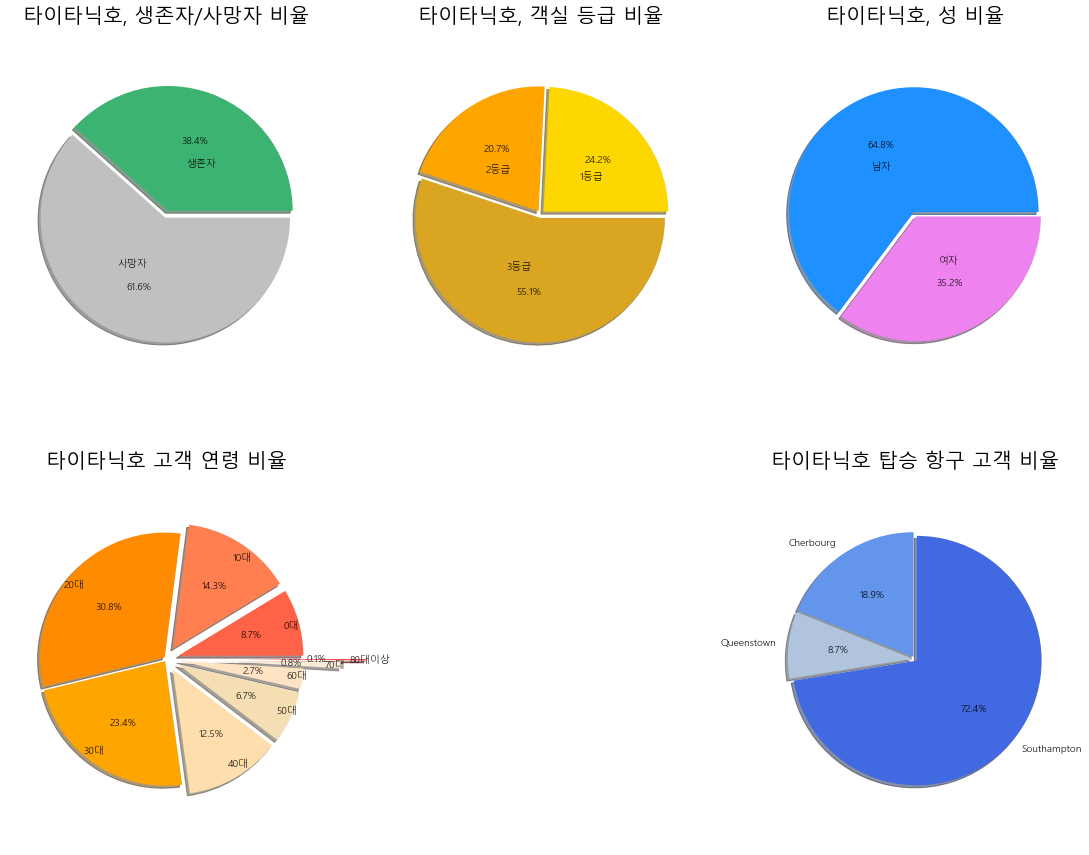

In [9]:
import matplotlib.pyplot as plt
import csv

f = open("./data/titanic.csv")
data = csv.reader(f)
next(data)

survived_died = [0,0] #생존자, 사망자
room_grade = [0,0,0] # 1, 2, 3 등급
gender = [0,0] # 남, 여
age = [0,0,0,0,0,0,0,0,0] # 0대~ 100대 이상
harbor = [0,0,0] # C,Q,S

for row in data:
    if row[1] == "1":
        survived_died[0] += 1
    if row[1] == "0":
        survived_died[1] += 1
    if row[2] == "1":
        room_grade[0] += 1
    if row[2] == "2":
        room_grade[1] += 1
    if row[2] == "3":
        room_grade[2] += 1
    if row[4] == "male":
        gender[0] += 1
    if row[4] == "female":
        gender[1] += 1
    if row[5] != "":
        for i in range(1,10):
            if int(float(row[5])) < i*10:
                age[i-1] += 1
                break
    if row[-1] == "C":
        harbor[0] += 1
    if row[-1] == "Q":
        harbor[1] += 1
    if row[-1] == "S":
        harbor[2] += 1
# print(survived_died, room_grade, gender ,age, harbor)

plt.figure(figsize=[19,15])
plt.subplot(2, 3, 1)
plt.axis('equal')
plt.rc("font", family="Malgun Gothic")
plt.title("타이타닉호, 생존자/사망자 비율",fontsize=20, color="black");
plt.pie(survived_died, labels=["생존자", "사망자"], autopct="%.1f%%", colors = ["mediumseagreen","silver"],labeldistance=0.4,explode=[0.03,0.03], textprops=dict(weight=10,color="black"),shadow=True)

plt.subplot(2, 3, 2)
plt.axis('equal')
plt.rc("font", family="Malgun Gothic")
plt.title("타이타닉호, 객실 등급 비율",fontsize=20, color="black");
plt.pie(room_grade, labels=["1등급", "2등급", "3등급"], autopct="%.1f%%", colors = ["gold","orange","goldenrod"],labeldistance=0.4,explode=[0.03,0.03,0.03],textprops=dict(weight=10,color="black"),shadow=True)

plt.subplot(2, 3, 3)
plt.axis('equal')
plt.rc("font", family="Malgun Gothic")
plt.title("타이타닉호, 성 비율",fontsize=20, color="black");
plt.pie(gender, labels=["남자", "여자"], autopct="%.1f%%", colors = ["dodgerblue","violet"],labeldistance=0.4,explode=[0.02,0.02], textprops=dict(weight=10,color="black"),shadow=True)

plt.subplot(2, 3, 4)
plt.axis('equal')
plt.rc("font", family="Malgun Gothic")
plt.title("타이타닉호 고객 연령 비율",fontsize=20, color="black");
plt.pie(age, labels=["0대","10대","20대","30대","40대","50대","60대","70대","80대이상"],labeldistance=0.87,autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '', colors = ["tomato","coral","darkorange","orange","navajowhite","wheat","bisque","antiquewhite","red"] ,explode=[0.1,0.1,0.02,0.02,0.1,0.1,0.1,0.4,0.6],textprops=dict(weight=5,color="black"),shadow=True)#1.3, 1.95


plt.subplot(2, 3, 6)
plt.axis('equal')
plt.rc("font", family="Malgun Gothic")
plt.title("타이타닉호 탑승 항구 고객 비율",fontsize=20, color="black");
plt.pie(harbor, labels=["Cherbourg", "Queenstown","Southampton"], autopct="%.1f%%", startangle=90,colors = ["cornflowerblue","lightsteelblue","royalblue"],explode=[0.02,0.02,0.02],textprops=dict(weight=10,color="black"),shadow=True)


plt.show()